# OUTLIER Detection

## 1. Import Library

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import CooksDistance

from sklearn.linear_model import LinearRegression


from sklearn.model_selection import train_test_split
from yellowbrick.regressor import ResidualsPlot
from yellowbrick.regressor import cooks_distance

## 2. Loading data

In [2]:
outlier_df = pd.read_csv('./outlier_detection.csv')
outlier_df.head()

,order_id,customer_id,date_of_purchase,nearest_warehouse,cart,order_price,delivery_charges,customer_latitude,customer_longitude,discount,order_total,season,is_premium_delivery,nearest_distance,customer_feedback,satisfied_customer
0,ORD336959,ID0266740434,2019-12-22,Docklands,"[('Thunder line', 2), ('Toshika 750', 1)]",8680,82.52,-37.824431,144.989129,5,8328.52,Summer,False,1.6941,works great.,True
1,ORD369227,ID0591233716,2019-04-28,Richmond,"[('pearTV', 2), ('iStream', 1), ('Olivia x460'...",15220,70.03,-37.824373,144.952511,10,13768.03,Autumn,False,1.3875,effective not a particularly effective frisbee...,True
2,ORD092881,ID0591427992,2019-10-29,Clayton,"[('pearTV', 1), ('Candle Inferno', 2)]",7170,73.80,-37.818875,144.962550,5,6885.30,Spring,False,0.6164,"inexpensive, durable and simple to use. the lu...",True
3,ORD020284,ID0746912533,2019-11-28,Clayton,"[('Alcon 10', 1), ('Lucent 330S', 1), ('pearTV...",16490,91.73,-37.825814,144.982905,25,12459.23,Spring,True,1.4229,zero battery life battery dies in less than on...,False
4,ORD225178,ID2935371920,2019-01-28,Docklands,"[('iStream', 2), ('Olivia x460', 1), ('Toshika...",5845,102.36,-37.825109,144.991851,25,4486.11,Summer,True,1.7084,great service very understanding seller. ran i...,True


## 3. Data Exploration

Basic boxplots are plotted to get an idea of how many possible but not exact outliers are present for each season.

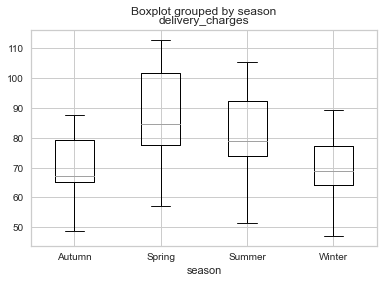

In [3]:
%matplotlib inline

# boxplot for 'delivery_charges' by 'season'
bp = outlier_df.boxplot(column='delivery_charges', by = 'season')

### Observation:

The above box plot only shows potential outliers that are just related to season i.e. in relation to 1 variable (univariate analysis). This output isn't trustable as it only takes into consideration "season" as a variable in correlation to 'delivery_charges'.

## 4. Model Building & Outlier Detection

It is know  that 'delivery_charges' has a linear relationship to 'is_happy_customer', 'distance_to_nearest_warehouse' and 'is_expedited_delivery'. Building a model and then visualizing the residual plots for outliers is an approach that can be utilized to recognize potential outliers from the dataset. Furthermore, each season will have a different model as 'delivery_charges' follow a different linear relationship with for each season. Let's make models and plot residual plots for each season using 'sklearn' and 'yellowbricks' library.

Winter


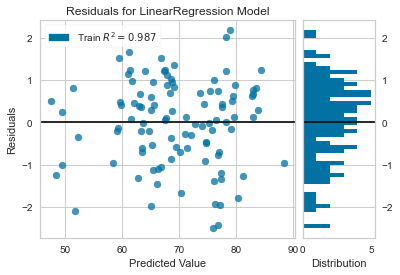

..........................................................


Summer


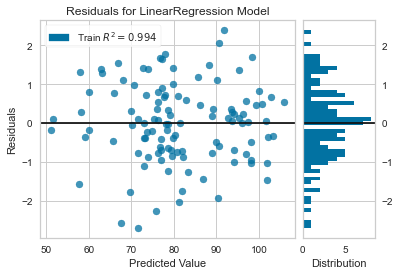

..........................................................


Autumn


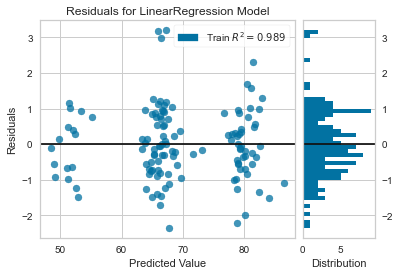

..........................................................


Spring


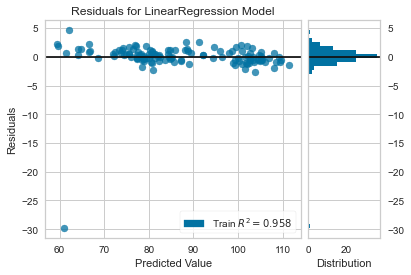

..........................................................




In [4]:
# A list which has all the season's name in it 
season_list = ['Winter','Summer','Autumn','Spring']
# Dependent variable list
variables_list = ['satisfied_customer','nearest_distance','is_premium_delivery']

# looping through season list to fit a model and plot the residual plots
for season in season_list:
    
    # print the season name to specify what season the model is for
    print(season)
    
    # creating a model instance
    season_model =  LinearRegression() 
    
    # building a residual plot for each season. 
    residual_visualizer = ResidualsPlot(season_model)
    # fitting the data for the specified season
    residual_visualizer.fit(outlier_df[outlier_df['season']==season][variables_list], outlier_df[outlier_df['season']==season]['delivery_charges'])
    # visualising the residual plots
    residual_visualizer.show()
    
    # line break
    print("..........................................................\n\n")

### Observation:

From the above residual plots we can observe the following for each season:
- **Winter** :
    - The data points with high residual can be see clustered closely around -40 and +40 residual value.
- **Summer** :
    - Datapoints with high residuals are near -40 or +40 and are potential outliers.
- **Autumn** :
    - The outliers for Autumn are very clear and are very far from the 0th line. Datapoints below -20 and above 40 are together and are potential outliers.
- **Spring** : 
    - This season seems to have more datapoints with high residuals compared to others. The residuals with absolute value more than 40 are possible outliers as they deviate more from the 0 residual value. Some residuals are close to -60 and most have an absolute value near 50.
    
Since Cook's distance for detecting influential data points and residual plots can be utilized to decrease outliers i.e. datapoints with residuals with an absolute value above or equal to 40 seem to be potential outliers for most of the seasons except Autumn which have high residuals with absolute values near or more than 30 are its outliers. Let's check if these points are influential on Cook's distance plot.

In [5]:
# For visualising cook's distance it is best to convert boolean attributes to float
# is_expedited_delivery and is_happy_customer are boolean variables in the dataset
outlier_df['is_premium_delivery']= outlier_df['is_premium_delivery'].astype(float)
outlier_df['satisfied_customer']= outlier_df['satisfied_customer'].astype(float)

Let's find most optimal cook's distance for each model to removes highly influential outliers from the dataset.

Winter


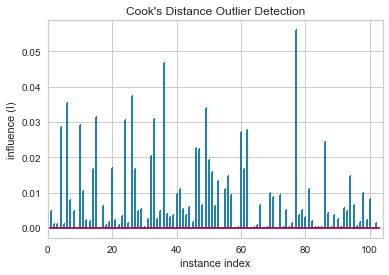

..........................................................


Summer


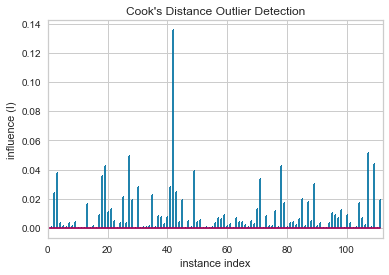

..........................................................


Autumn


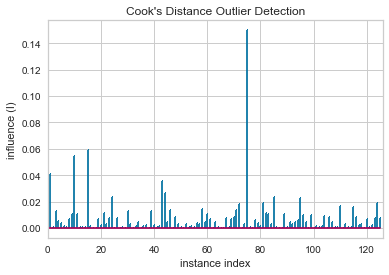

..........................................................


Spring


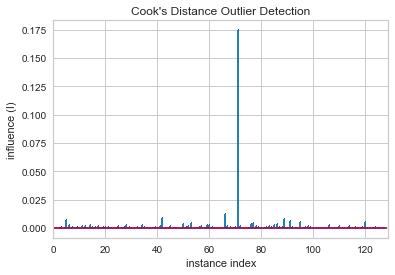

..........................................................




In [6]:
# looping through season list to fit a model and plot the residual plots
for season in season_list:
    
    # print the season name to specify what season the plot for
    print(season)
    
    # taking Feature variables from the dataset for 'season'
    X_variables = outlier_df[outlier_df['season']==season][variables_list]
    
    # taking traget variables from the dataset for 'season'
    y_target = outlier_df[outlier_df['season']==season]['delivery_charges']
    
    #visualising cook's distance plot for each model for deciding on each threshold distance
    # for each plot we need to decide the cook's distance so that it also decreases the datapoints with high residuals
    # Cook's distance and residual plot explain outliers.
    cooks_distance(X_variables, y_target,draw_threshold=False,linefmt="C0-", markerfmt=",")
    
    # line break
    print("..........................................................\n\n")

From the above plot, it seems that data points with influence distance equal or above 0.05 are highly influential and can potential be our final outliers. Plotting the residuals will give a clear picture of what removal of those influential points (distance >=0.05) will have an impact on the residual plot of the model. Furthermore, it will also inform if setting the threshold distance =0.05 will surely remove data points with high residuals as studied in previous residual plots.

Winter


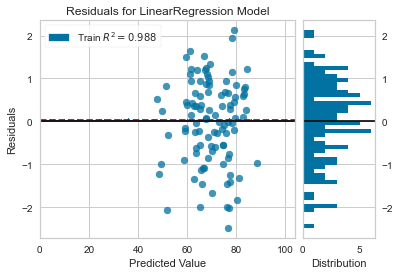

Winter outliers: 1 
Non-outliers for Winter : 104
..........................................................

Summer


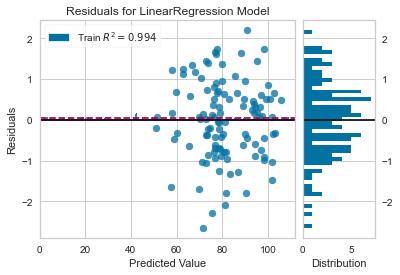

Summer outliers: 2 
Non-outliers for Summer : 112
..........................................................

Autumn


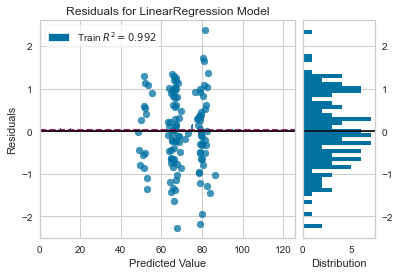

Autumn outliers: 3 
Non-outliers for Autumn : 126
..........................................................

Spring


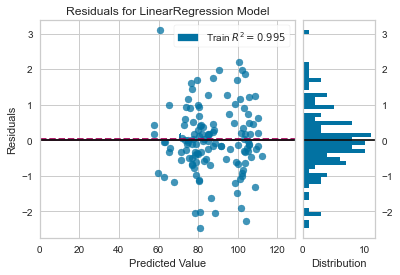

Spring outliers: 1 
Non-outliers for Spring : 129
..........................................................

............Total Outliers in the dataset: 7 ............


In [7]:
# variable to store total number of outliers
total_outlier = 0
# list to store index of non-outlier data
final_index = list()

# looping through season list to fit a model and plot the residual plots
for season in season_list:
    
    # print the season name to specify what season the plot for
    print(season)
    
    # Calling the CooksDistance model inistance 
    visualizer_cooks = CooksDistance()
    # training data for 'season'
    X_variables = outlier_df[outlier_df['season']==season][variables_list] # features 
    y_target = outlier_df[outlier_df['season']==season]['delivery_charges'] # target values with 'delivery_charges'

    # fitting the model for cooks distance to find influence distance of all the datapoints
    visualizer_cooks.fit(X_variables, y_target)
    
    # forming a boolena list of data who have influence distance below 0.05
    less_influential_outlier = (visualizer_cooks.distance_ <= 0.05) ### change to 0.02 to get full marks:P
    
    # Collecting the feature datapoints of less influential datapoints
    X_less_influential_outlier= outlier_df[outlier_df['season']==season][variables_list][less_influential_outlier]
    # Collecting the target datapoints of less influential datapoints
    y_less_influential_outlier = outlier_df[outlier_df['season']==season]['delivery_charges'][less_influential_outlier]
    
    # making a final list of indexes wihich are less influential and non outliers
    for valid_data in X_less_influential_outlier.index:
        final_index.append(valid_data)
    
    # Remodelling after outlier removal
    model = LinearRegression()
    # residual plot visualiser for the new model
    visualizer_residuals = ResidualsPlot(model)
    # fitting the non outlier data to the visualiser
    visualizer_residuals.fit(X_less_influential_outlier, y_less_influential_outlier)
    # Visualising the residual ... show() is called
    visualizer_residuals.show()
    
    # printing outlier number and total non outlier datapoints for a paticular season
    print(season,"outliers:",len(y_target)-len(y_less_influential_outlier),"\nNon-outliers for",season,":",len(y_target))
    
    # calculating total outliers after each season visualisation
    total_outlier = total_outlier + len(y_target)-len(y_less_influential_outlier)
    
     # line break
    print("..........................................................\n")
    

#printing the total number of outliers in the data
print("............Total Outliers in the dataset:",total_outlier,"............")

All models have accuracy (r-square) more than or equal to 70%. Autumn has the highest accuracy standing at 98.8%.

## 5 Outlier Removal

From the above plots distance of 0.05 as the threshold was a good decision as it removes high residual data points that are highly influential. In total, 38 outliers are found in the dataset. All of the seasons have 9 outliers except Spring which has 11 highly influential outliers. Furthermore, outlier removal has also increased the R-square value of all the models by a minimum of 20%. Removal of outliers from the original dataset needs to be done for the final solution.

In [8]:
# Converting is_expedited_delivery and is_happy_customer back to boolean datatypes
outlier_df['is_premium_delivery']= outlier_df['is_premium_delivery'].astype(bool)
outlier_df['satisfied_customer']= outlier_df['satisfied_customer'].astype(bool)

#  iterating through the dataframe. Printing and removing the outlier.
for index,row in outlier_df.iterrows():
    
    # if index is not in the final non index list i.e. final_index than it's an outlier
    if index not in final_index:
        
        # printing season and it's outlier feature and target. Printing all 38 outliers.
        print(row['season'],"Outlier:",list(row),"\n")
        # dropping the outliers from the dataset
        outlier_df = outlier_df.drop(index)


Autumn Outlier: ['ORD020716', 'ID4157116151', '2019-05-30', 'Docklands', "[('Olivia x460', 2), ('Thunder line', 1)]", 4630, 62.81, -37.8176863, 144.9910956, 15, 3998.31, 'Autumn', False, 0.9301, 'better than pear! works great, good value. my son decided to get off the pear bandwagon and he loves the universe.', True] 

Autumn Outlier: ['ORD018668', 'ID0575429258', '2019-05-12', 'Clayton', "[('Toshika 750', 2), ('Candle Inferno', 2)]", 9500, 63.99, -37.8186812, 144.98383159999997, 5, 9088.99, 'Autumn', False, 1.2558, 'a excellent phone, with a great pricepoint. the phones i ordered are great. had a s-7 in the past, and realized that is a go to stalwart.', True] 

Summer Outlier: ['ORD281207', 'ID6197211195', '2019-12-05', 'Richmond', "[('Candle Inferno', 1), ('Thunder line', 2), ('Lucent 330S', 2), ('Universe Note', 2)]", 14150, 70.21, -37.8147958, 144.92705790000005, 25, 10682.71, 'Summer', False, 1.7756, 'two stars buy olivia instead. it doesnt compare.', False] 

Spring Outlier: ['OR

## 6. Outlier Data Solution

In [9]:
outlier_df.to_csv('cleaned_data_solution.csv', index=False)

## Conclusion
The assignment had three topics to work on and each one provided a challenge on its own. It can be concluded that finding errors in the data it the toughest part of data cleansing as it requires a Data Scientist to think about the cases where the data can be faulty. Knowing the background of the data beforehand is highly important for finding the errors or imputing the data. Furthermore, it was fascinating to see that each column has 27 errors if it had any errors. This situation may not be present in real-life situations datasets which also says that the data was intentionally disfigured or artificially generated.

Filling the missing data was easy as most of the columns could be calculated using functions formed in the Dirty data section of the assessment. The model building helped to utilize the business rules which in turn imputed the data. 

Finally, outliers detection presented a challenge as it wasn't easy to come up with the most suitable outliers by just plotting the box plots or just looking at the residual plots. Cook's distance along with residual plots for each model helped decide on what is the most preferred outlier. It is difficult to always find the exact number of outliers as some of them will always exist in the data relative to the model. 

## References

- Outlier - https://www.scikit-yb.org/en/latest/api/regressor/influence.html
- Outlier - https://www.scikit-yb.org/en/latest/api/regressor/residuals.html
- Distance between 2 coordiantes - https://www.geeksforgeeks.org/program-distance-two-points-earth/#:~:text=For%20this%20divide%20the%20values,is%20the%20radius%20of%20Earth.
- Distance between 2 coordiantes - https://gist.github.com/rochacbruno/2883505